# # Author : prabhukumar
Task 1 : Prediction using Supervised Machine Learning


GRIP @ The Sparks Foundation


A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts and they had an objective to identify the relevant variables for price prediction


This is a simple linear regression task as it involves just two variables.  

# Technical Stack : Sikit Learn, Numpy Array, Pandas, Matplotlib 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [162]:
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
import statsmodels.api as sm

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
  


# Step 1 - Reading the data from source

In [166]:
### Visualizing Charts ::

plt.rcParams['figure.figsize']=[15,6]

In [167]:
pd.set_option('display.max_columns', None)

In [168]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [169]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [170]:
df.shape

(205, 26)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [172]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [173]:
for i in df.columns:
    print(i,'\n',df[i].unique(),'\n',df[i].nunique())

car_ID 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205] 
 205
symboling 
 [ 3  1  2  0 -1 -2] 
 6
CarName 
 ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi f

In [174]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<AxesSubplot:>

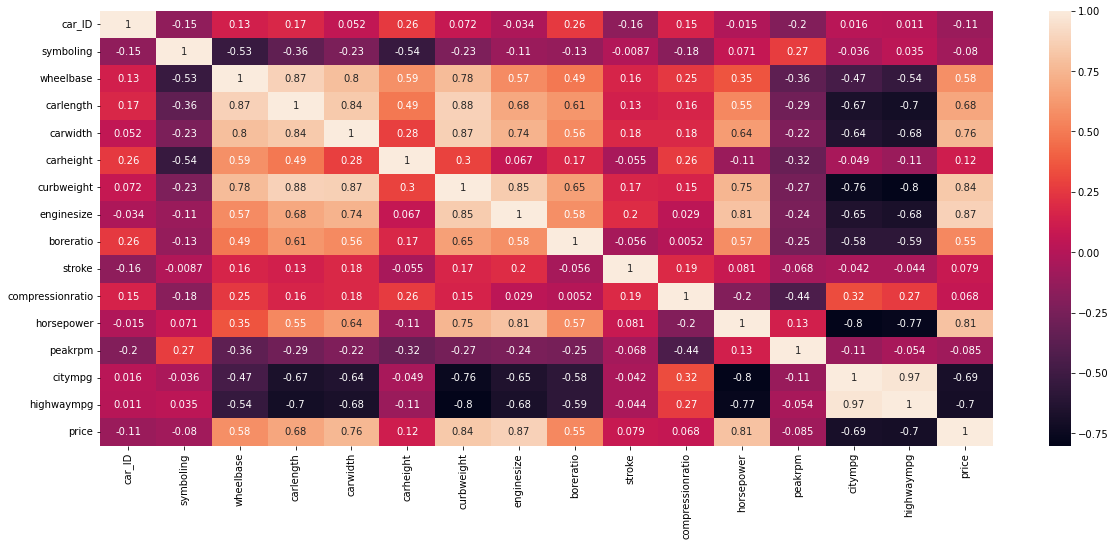

In [175]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

In [176]:
# Target variable is highly correlated with  curbweight,enginesize,horsepower,carwidth

In [177]:
def company(x):
    return x.split(' ')[0]

In [178]:
df['company_name']=df['CarName'].apply(company)

In [179]:
df.company_name.nunique()

28

In [180]:
df.drop(['car_ID','CarName'],axis=1,inplace=True)

In [181]:
df.company_name.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: company_name, dtype: int64

In [182]:
df.duplicated().sum()

0

In [183]:
df.head(1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero


In [184]:
df.shape

(205, 25)

# Step 2 - Input data Visualization


In [185]:
# target variable is price

<AxesSubplot:xlabel='price', ylabel='Density'>

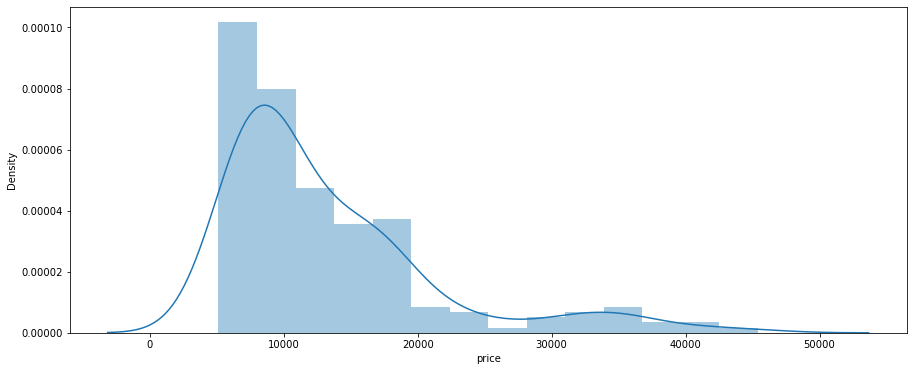

In [186]:
sns.distplot(df.price)

In [187]:
# as we can see the price column is right skewed we can apply transformation to reduce skewness
# pt=PowerTransformer(method='yeo-johnson')
# df.price=pt.fit_transform(pd.DataFrame(df.price))
# sns.distplot(df.price)

In [188]:
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

# Step 3 - Plotting the scatter plot of numerical columns with respect to target

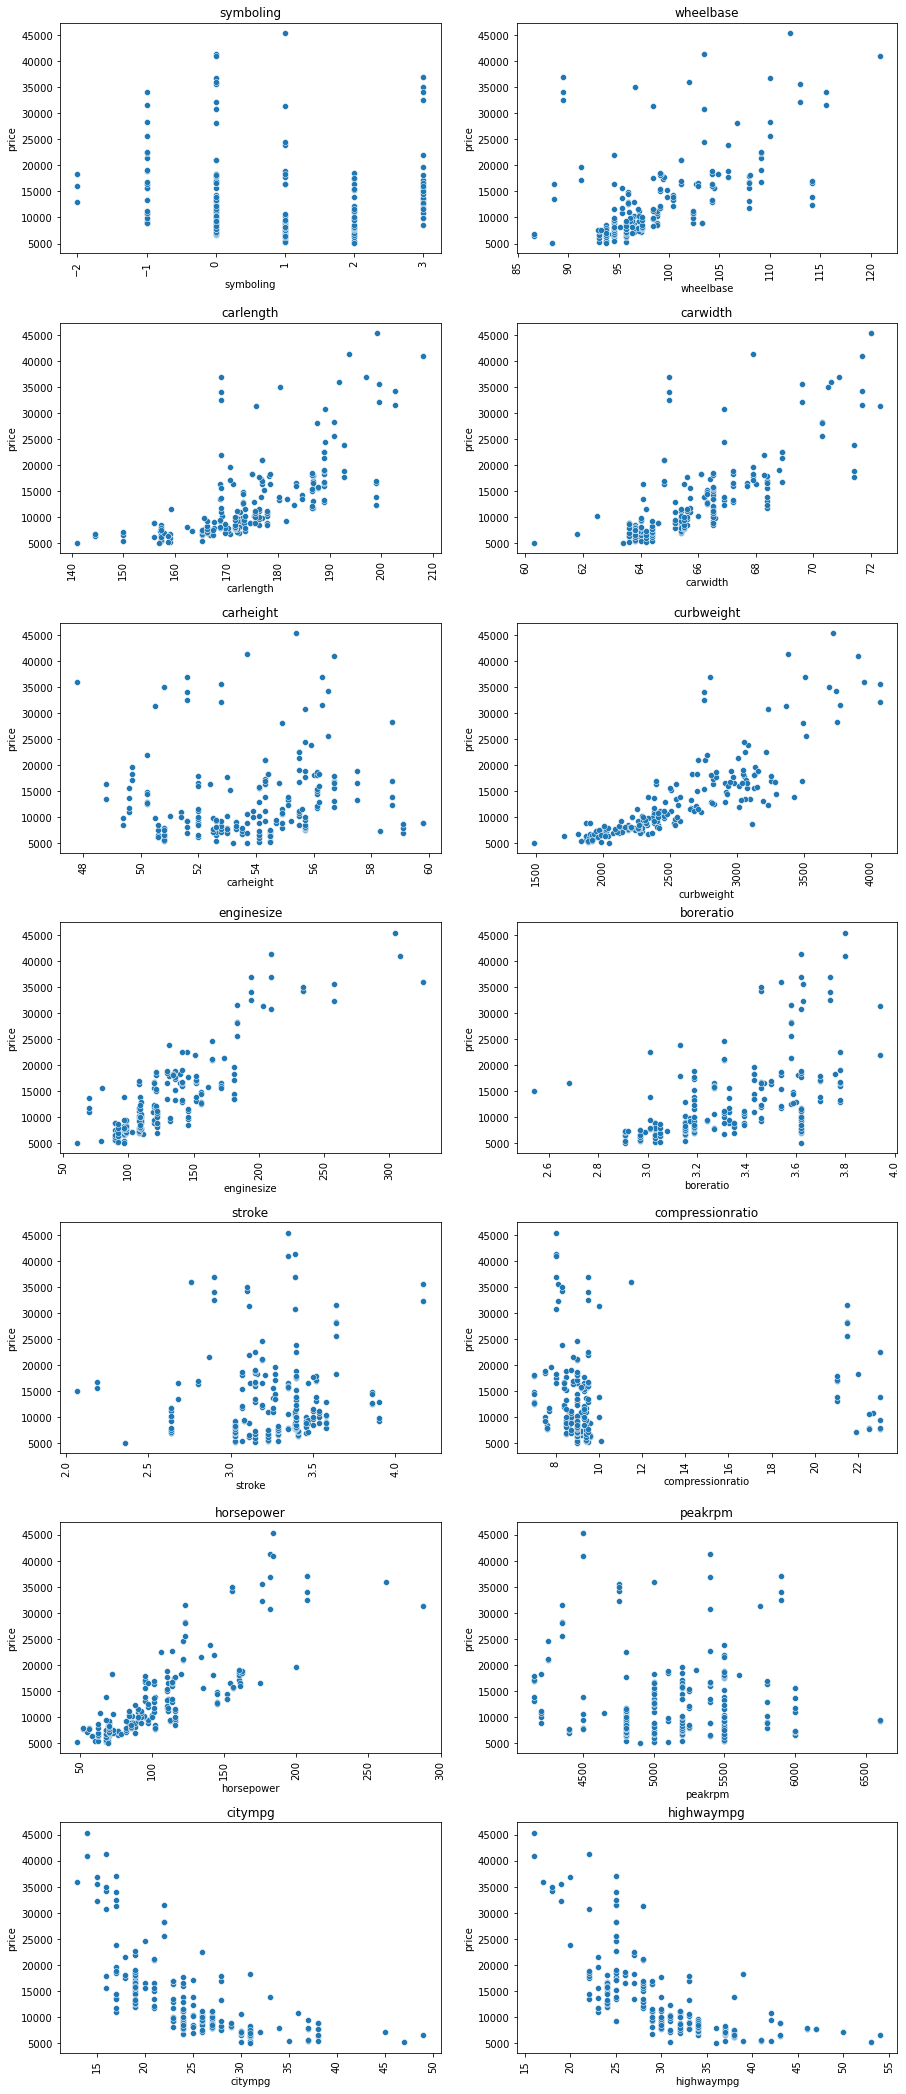

In [189]:
cols=['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']
rows=7
columns=2
iterator=1

for i in cols:
    plt.subplots_adjust(left=None, bottom=0.3, right=None, top=5, wspace=None, hspace=0.3)


    plt.subplot(rows,columns,iterator)
    #scatter plot of numerical columns with respect to target i.e.Item_Outlet_Sales
    sns.scatterplot(df.loc[:,i],df.price)
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

In [190]:
# 'carlength', 'carwidth','curbweight', 'enginesize','boreratio' are directly proportional to price

In [191]:
#'citympg' and 'highwaympg' are inversely proportional to price 

In [192]:
cat_var=df.select_dtypes(include=object).columns
cat_var

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'company_name'],
      dtype='object')

# Step 4 - Plotting the  barplot.subplots_adjust

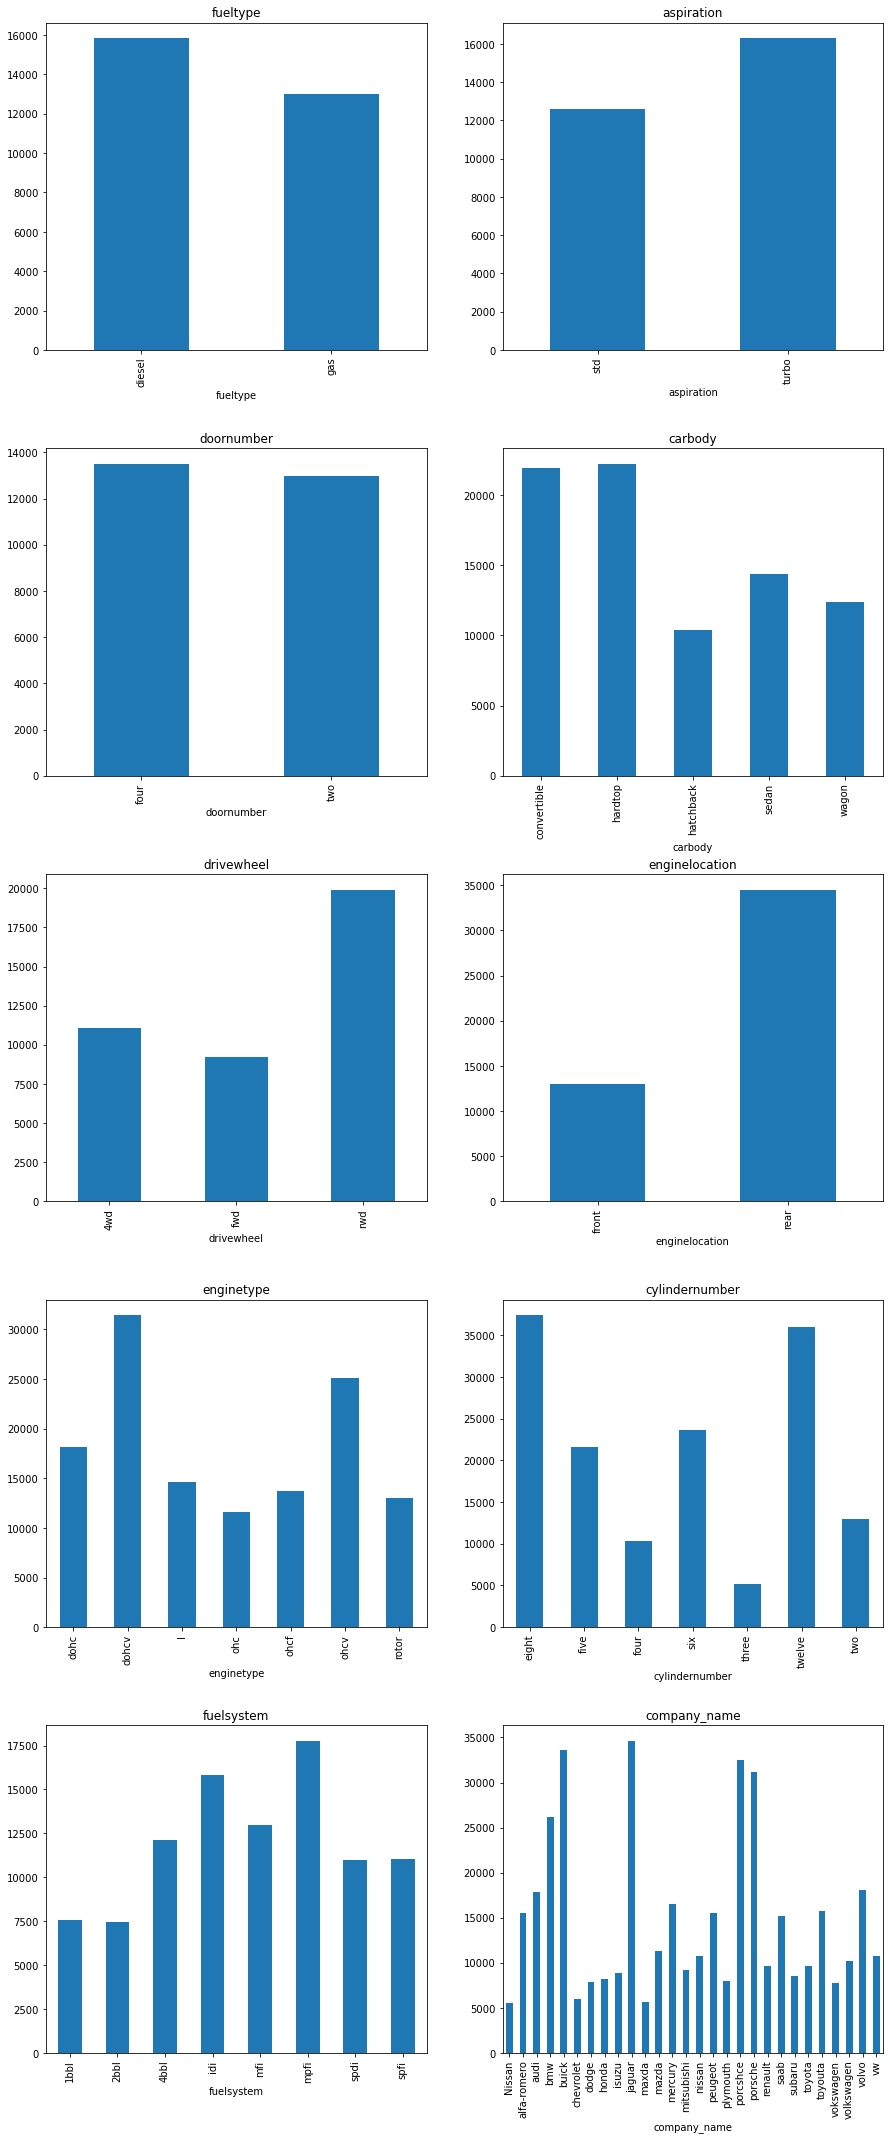

In [193]:
row=5
col=2
iterator=1
for i in  cat_var:
#     plt.subplots_adjust(left=None, bottom=1, right=None, top=10, wspace=None, hspace=1.3)
    plt.subplots_adjust(left=None, bottom=0.3, right=None, top=5, wspace=None, hspace=0.3)
    
    plt.subplot(row,col,iterator)
    df.groupby(i)['price'].mean().plot(kind='bar')
    plt.title(i)
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [194]:
# applyinh yeojohnson transformation on df.price column in

<AxesSubplot:xlabel='price', ylabel='Density'>

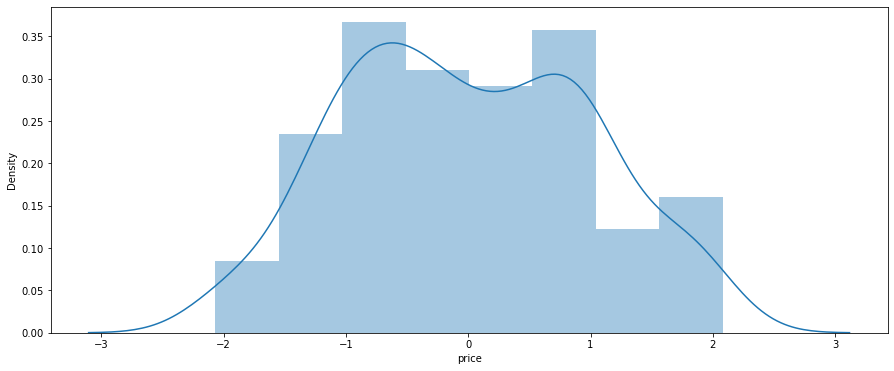

In [195]:
# as we can see the price column is right skewed we can apply transformation to reduce skewness
pt=PowerTransformer(method='yeo-johnson')
df.price=pt.fit_transform(pd.DataFrame(df.price))
sns.distplot(df.price)

In [196]:
num_cols

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [198]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
up=q3+(1.5*iqr)
ll=q1-(1.5*iqr)

In [199]:
df_trim=df[~((df<ll)|(df>up)).any(axis=1)]

In [200]:
df_trim.shape

(139, 25)

In [201]:
ss=StandardScaler()

In [202]:

df_trim.iloc[:,[7,8,9,10,11,14,16,17,18,19,20,21,22]]=ss.fit_transform(pd.DataFrame(df_trim.iloc[:,[7,8,9,10,11,14,16,17,18,19,20,21,22]]))

In [203]:
df_trim.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,gas,std,two,convertible,rwd,front,-2.005234,-0.252339,-0.791926,-1.972420,0.346204,dohc,four,0.548082,mpfi,0.829953,-3.171746,0.053945,0.480246,-0.540853,-0.857261,-0.817554,0.468027,alfa-romero
1,3,gas,std,two,convertible,rwd,front,-2.005234,-0.252339,-0.791926,-1.972420,0.346204,dohc,four,0.548082,mpfi,0.829953,-3.171746,0.053945,0.480246,-0.540853,-0.857261,-0.817554,0.826806,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,-0.697695,-0.027138,0.135881,-0.487094,1.029973,ohcv,six,1.390309,mpfi,-2.389303,1.102793,0.053945,1.950001,-0.540853,-1.219999,-0.996515,0.826806,alfa-romero
3,2,gas,std,four,sedan,fwd,front,0.476875,0.479565,0.599785,0.296828,-0.178433,ohc,four,-0.255863,mpfi,-0.311049,0.724036,1.937962,0.172623,0.685550,-0.313155,-0.280672,0.530368,audi
4,2,gas,std,four,sedan,4wd,front,0.388228,0.479565,0.732329,0.296828,1.032459,ohc,five,0.777780,mpfi,-0.311049,0.724036,-1.830071,0.616968,0.685550,-1.401368,-1.712357,0.918904,audi


# Step 4 - import variance_inflation_factor as vif and remove insignificant variables

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [205]:
df_copy=df_trim.copy()

In [206]:
n=df_copy.select_dtypes(include=np.number).columns
n

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [207]:
ndf=df_copy.loc[:,['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

In [208]:
[i for i in range(ndf.shape[1])]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [209]:
v=pd.DataFrame()
v['variance']=[vif(ndf.values,i) for i in range(ndf.shape[1])]

In [210]:
v['columns']=ndf.columns

In [211]:
v.sort_values(by='variance',ascending=False)

,variance,columns
12,33.628690,citympg
13,32.208017,highwaympg
5,12.033709,curbweight
2,7.931516,carlength
10,6.582589,horsepower
1,5.801045,wheelbase
6,5.609368,enginesize
3,4.921432,carwidth
7,3.064599,boreratio
4,2.172691,carheight


In [212]:
ndf.drop('citympg',axis=1,inplace=True)

In [213]:
v=pd.DataFrame()
v['variance']=[vif(ndf.values,i) for i in range(ndf.shape[1])]

In [214]:
v['columns']=ndf.columns

In [215]:
v.sort_values(by='variance',ascending=False)

,variance,columns
5,12.030638,curbweight
2,7.435659,carlength
10,6.491784,horsepower
12,6.033010,highwaympg
6,5.573894,enginesize
1,5.569005,wheelbase
3,4.918734,carwidth
7,3.006466,boreratio
4,2.146816,carheight
11,1.800552,peakrpm


In [216]:
ndf.drop('curbweight',axis=1,inplace=True)

In [217]:
v=pd.DataFrame()
v['variance']=[vif(ndf.values,i) for i in range(ndf.shape[1])]

In [218]:
v['columns']=ndf.columns

In [219]:
v.sort_values(by='variance',ascending=False)

,variance,columns
2,6.758108,carlength
9,6.277010,horsepower
1,5.551187,wheelbase
3,4.859936,carwidth
5,4.805771,enginesize
11,4.614379,highwaympg
6,3.005252,boreratio
4,2.111666,carheight
10,1.794601,peakrpm
0,1.532592,symboling


In [220]:
df_trim.drop(['citympg','curbweight'],axis=1,inplace=True)

In [221]:
df_trim.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,company_name
0,3,gas,std,two,convertible,rwd,front,-2.005234,-0.252339,-0.791926,-1.972420,dohc,four,0.548082,mpfi,0.829953,-3.171746,0.053945,0.480246,-0.540853,-0.817554,0.468027,alfa-romero
1,3,gas,std,two,convertible,rwd,front,-2.005234,-0.252339,-0.791926,-1.972420,dohc,four,0.548082,mpfi,0.829953,-3.171746,0.053945,0.480246,-0.540853,-0.817554,0.826806,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,-0.697695,-0.027138,0.135881,-0.487094,ohcv,six,1.390309,mpfi,-2.389303,1.102793,0.053945,1.950001,-0.540853,-0.996515,0.826806,alfa-romero
3,2,gas,std,four,sedan,fwd,front,0.476875,0.479565,0.599785,0.296828,ohc,four,-0.255863,mpfi,-0.311049,0.724036,1.937962,0.172623,0.685550,-0.280672,0.530368,audi
4,2,gas,std,four,sedan,4wd,front,0.388228,0.479565,0.732329,0.296828,ohc,five,0.777780,mpfi,-0.311049,0.724036,-1.830071,0.616968,0.685550,-1.712357,0.918904,audi


In [222]:
for i in df_trim.columns:
    print(i,'\n',df_trim[i].unique(),'\n',df_trim[i].nunique())

symboling 
 [ 3  1  2  0 -1 -2] 
 6
fueltype 
 ['gas'] 
 1
aspiration 
 ['std' 'turbo'] 
 2
doornumber 
 ['two' 'four'] 
 2
carbody 
 ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 
 5
drivewheel 
 ['rwd' 'fwd' '4wd'] 
 3
enginelocation 
 ['front'] 
 1
wheelbase 
 [-2.00523446 -0.69769468  0.47687495  0.38822819  0.78713863  1.29685753
 -0.87498821  1.25253415 -2.44846829 -0.25446086 -0.74201806 -0.36526931
 -1.00795836 -0.52040115  0.25525804  1.6071212   1.119564   -1.03012005
 -0.29878424 -0.56472453 -0.09932902  0.6098451  -1.4068688   0.34390481
  2.27197194  3.66815849  0.32174311 -0.43175439  0.16661128  1.05307892
  1.16388738  1.51847444 -0.07716733  1.47415106  2.53791224] 
 35
carlength 
 [-0.25233868 -0.02713755  0.479565    0.54524867  0.49833177  1.6431042
 -1.46279478 -1.19067674 -1.33142745  0.29189739 -2.52311678 -2.01641423
 -0.75904123 -1.35019421 -0.37432263  0.36696444 -0.22418854 -0.07405445
  0.10422978 -1.1625266  -0.44000629 -0.23357192  0.59216557  0.32

In [223]:
df_trim.company_name.value_counts()

toyota         26
nissan         15
mazda          13
honda          12
volvo          10
mitsubishi     10
dodge           8
volkswagen      6
plymouth        6
bmw             5
saab            5
isuzu           4
peugeot         3
alfa-romero     3
audi            3
maxda           2
chevrolet       2
vw              2
porsche         1
mercury         1
toyouta         1
Nissan          1
Name: company_name, dtype: int64

In [224]:
count=df_trim.company_name.value_counts()
limit=6
low_freq=count[count<limit].index

In [225]:
low_freq

Index(['bmw', 'saab', 'isuzu', 'peugeot', 'alfa-romero', 'audi', 'maxda',
       'chevrolet', 'vw', 'porsche', 'mercury', 'toyouta', 'Nissan'],
      dtype='object')

In [226]:
count[count<limit]

bmw            5
saab           5
isuzu          4
peugeot        3
alfa-romero    3
audi           3
maxda          2
chevrolet      2
vw             2
porsche        1
mercury        1
toyouta        1
Nissan         1
Name: company_name, dtype: int64

In [227]:
df_trim.company_name=df_trim.company_name.replace(low_freq,'other')

In [228]:
df_trim.company_name.value_counts()

other         33
toyota        26
nissan        15
mazda         13
honda         12
mitsubishi    10
volvo         10
dodge          8
plymouth       6
volkswagen     6
Name: company_name, dtype: int64

In [229]:
df_trim.select_dtypes(include=object).columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'company_name'],
      dtype='object')

In [230]:
df_scaled=pd.get_dummies(data=df_trim,columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'company_name'],drop_first=True)

In [231]:
df_scaled.head()

,symboling,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_name_honda,company_name_mazda,company_name_mitsubishi,company_name_nissan,company_name_other,company_name_plymouth,company_name_toyota,company_name_volkswagen,company_name_volvo
0,3,-2.005234,-0.252339,-0.791926,-1.972420,0.548082,0.829953,-3.171746,0.053945,0.480246,-0.540853,-0.817554,0.468027,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,3,-2.005234,-0.252339,-0.791926,-1.972420,0.548082,0.829953,-3.171746,0.053945,0.480246,-0.540853,-0.817554,0.826806,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1,-0.697695,-0.027138,0.135881,-0.487094,1.390309,-2.389303,1.102793,0.053945,1.950001,-0.540853,-0.996515,0.826806,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,2,0.476875,0.479565,0.599785,0.296828,-0.255863,-0.311049,0.724036,1.937962,0.172623,0.685550,-0.280672,0.530368,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,2,0.388228,0.479565,0.732329,0.296828,0.777780,-0.311049,0.724036,-1.830071,0.616968,0.685550,-1.712357,0.918904,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [232]:
df_scaled.dtypes

symboling                    int64
wheelbase                  float64
carlength                  float64
carwidth                   float64
carheight                  float64
enginesize                 float64
boreratio                  float64
stroke                     float64
compressionratio           float64
horsepower                 float64
peakrpm                    float64
highwaympg                 float64
price                      float64
aspiration_turbo             uint8
doornumber_two               uint8
carbody_hardtop              uint8
carbody_hatchback            uint8
carbody_sedan                uint8
carbody_wagon                uint8
drivewheel_fwd               uint8
drivewheel_rwd               uint8
enginetype_l                 uint8
enginetype_ohc               uint8
enginetype_ohcv              uint8
enginetype_rotor             uint8
cylindernumber_four          uint8
cylindernumber_six           uint8
cylindernumber_two           uint8
fuelsystem_2bbl     

In [233]:
x=df_scaled.drop('price',axis=1)
y=df_scaled['price']

In [234]:
x=sm.add_constant(x)

# Step 6 - Model Training

In [235]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

# Step 7- Making Predictions

In [236]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(111, 42)
(28, 42)
(111,)
(28,)


In [238]:
model=sm.OLS(ytrain,xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     14.85
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           1.22e-21
Time:                        15:12:31   Log-Likelihood:                -19.658
No. Observations:                 111   AIC:                             119.3
Df Residuals:                      71   BIC:                             227.7
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2822      1.112     -0.254      0.800      -2.499       1.935
symboling                   0.0800      0.076      1.053      0.296      -0.072       0.232
wheelbase                   0.2541      0.142      1.790      0.078      -0.029       0.537
carlength                   0.2018      0.119      1.703      0.093      -0.035       0.438
carwidth                    0.1087      0.113      0.960      0.340      -0.117       0.335
carheight                  -0.1679      0.093     -1.807      0.075      -0.353       0.017
enginesize                  0.4762      0.452      1.054      0.295      -0.424       1.377
boreratio                  -0.2231      0.273     -0.817      0.416      -0.767       0.321
stroke                     -0.1346      0.105     -1.283      0.204      -0.344       0.075
compressionratio           -0.0532      0.084     -0.635      0.527      -0.220       0.114
horsepower                  0.1492      0.179      0.836      0.406      -0.207       0.505
peakrpm                     0.0896      0.090      0.991      0.325      -0.091       0.270
highwaympg                  0.0171      0.120      0.142      0.887      -0.222       0.257
aspiration_turbo            0.1566      0.280      0.560      0.577      -0.401       0.714
doornumber_two             -0.1886      0.126     -1.491      0.140      -0.441       0.064
carbody_hardtop            -0.9000      0.478     -1.883      0.064      -1.853       0.053
carbody_hatchback          -0.6451      0.427     -1.511      0.135      -1.497       0.206
carbody_sedan              -0.5811      0.451     -1.289      0.202      -1.480       0.318
carbody_wagon              -0.4092      0.499     -0.821      0.415      -1.403       0.585
drivewheel_fwd             -0.5809      0.350     -1.660      0.101      -1.278       0.117
drivewheel_rwd             -0.4180      0.398     -1.050      0.297      -1.212       0.376
enginetype_l               -0.1467      0.588     -0.249      0.804      -1.320       1.026
enginetype_ohc              0.4710      0.302      1.562      0.123      -0.130       1.072
enginetype_ohcv            -0.1124      0.396     -0.284      0.777      -0.902       0.677
enginetype_rotor            0.7176      0.667      1.075      0.286      -0.613       2.048
cylindernumber_four         0.2112      0.610      0.347      0.730      -1.004       1.427
cylindernumber_six         -0.2189      0.521     -0.420      0.676      -1.258       0.820
cylindernumber_two          0.7176      0.667      1.075      0.286      -0.613       2.048
fuelsystem_2bbl             0.2045      0.454      0.451      0.654      -0.700       1.109
fuelsystem_4bbl             0.4402      0.694      0.634      0.528      -0.944       1.825
fuelsystem_mpfi             0.4712      0.543  

# Step 8 - Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [239]:
lr=LinearRegression()


In [240]:
lrmodel=lr.fit(xtrain,ytrain)

In [241]:
ypred=lrmodel.predict(xtest)

In [246]:
mae = mean_absolute_error(ytest,ypred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(ytest,ypred) #default=True
rmse = mean_squared_error(ytest,ypred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.6557418892338446
MSE: 0.7157273669296567
RMSE: 0.8460067180168587


# The Mean Squared Error measures how close a regression line is to a set of data points. 
# It is a risk function corresponding to the expected value of the squared error loss. 
# Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.

# Conclusion
I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.
Thank You